In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Install Libraries and Modules

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
!pip uninstall -y wandb

Found existing installation: wandb 0.19.1
Uninstalling wandb-0.19.1:
  Successfully uninstalled wandb-0.19.1


In [4]:
!pip install wandb==0.17.5 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.2 MB/s eta 0:00:0000:0100:01


In [5]:
import wandb

In [6]:
!wandb offline
!wandb disabled

W&B offline. Running your script from this directory will only write metadata locally. Use wandb disabled to completely turn off W&B.
W&B disabled.


In [7]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [8]:
!pip install datasets transformers evaluate sentencepiece accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.7 MB/s eta 0:00:00


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import Dataset
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [10]:
import os

path = '/kaggle/input'
print(os.listdir(path))


['public_data_test']


In [11]:
train_rus = pd.read_csv("/kaggle/input/public_data_test/track_b/train/rus.csv")
train_rus = pd.read_csv("/kaggle/input/public_data_test/track_b/train/rus.csv")


dev_rus = pd.read_csv("/kaggle/input/public_data_test/track_b/dev/rus.csv")
dev_rus = pd.read_csv("/kaggle/input/public_data_test/track_b/dev/rus.csv")


test_rus = pd.read_csv("/kaggle/input/public_data_test/track_b/test/rus.csv")
test_rus = pd.read_csv("/kaggle/input/public_data_test/track_b/test/rus.csv")

# BRAZILIAN PORTUGUESE

In [12]:
train_rus.head()

,id,text,anger,disgust,fear,joy,sadness,surprise
0,rus_train_track_b_00001,Я в душ боюсь идти из-за носа :с,0,0,2,0,0,0
1,rus_train_track_b_00002,Аааа тишина грёбаная!! почему ты не можешь ход...,3,0,0,0,0,0
2,rus_train_track_b_00003,"МАЛФОЙ, У ТЯ ПРЕКРАСНЫЙ ГОЛОС!!!!!!!!!!!!!!!!!...",0,0,0,3,0,0
3,rus_train_track_b_00004,иди в жопу,2,0,0,0,0,0
4,rus_train_track_b_00005,"Прежде, чем подумать, подумай — стоит ли думать.",0,0,0,0,0,0


In [13]:
train_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2220 non-null   object
 1   text      2220 non-null   object
 2   anger     2220 non-null   int64 
 3   disgust   2220 non-null   int64 
 4   fear      2220 non-null   int64 
 5   joy       2220 non-null   int64 
 6   sadness   2220 non-null   int64 
 7   surprise  2220 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.9+ KB


In [14]:
dev_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        343 non-null    object
 1   text      343 non-null    object
 2   anger     343 non-null    int64 
 3   disgust   343 non-null    int64 
 4   fear      343 non-null    int64 
 5   joy       343 non-null    int64 
 6   sadness   343 non-null    int64 
 7   surprise  343 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 21.6+ KB


<Axes: >

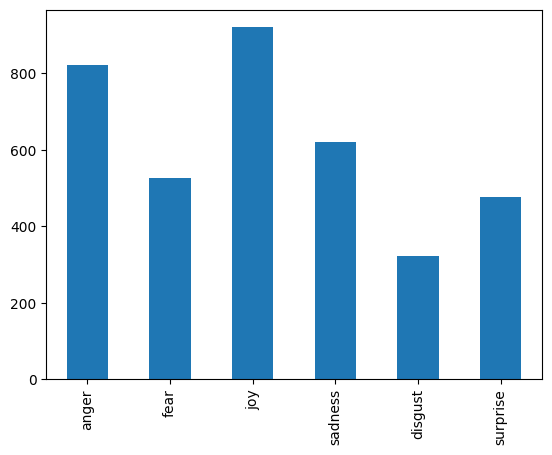

In [15]:
attributes = ['anger', 'fear', 'joy', 'sadness', 'disgust','surprise']
train_rus[attributes].sum().plot.bar()

<Axes: >

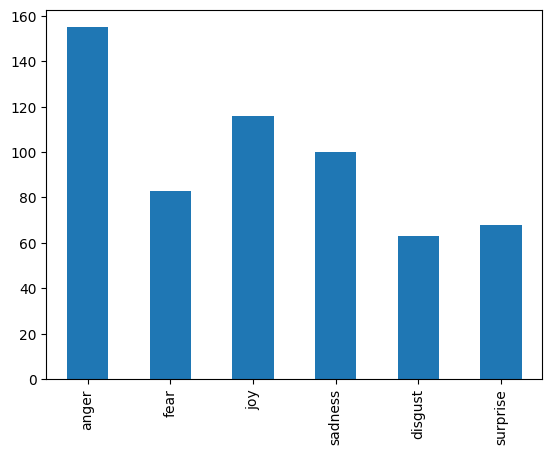

In [16]:
dev_rus[attributes].sum().plot.bar()

In [17]:
test_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        650 non-null    object 
 1   text      650 non-null    object 
 2   anger     0 non-null      float64
 3   disgust   0 non-null      float64
 4   fear      0 non-null      float64
 5   joy       0 non-null      float64
 6   sadness   0 non-null      float64
 7   surprise  0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 40.8+ KB


In [18]:
test_rus.head()

,id,text,anger,disgust,fear,joy,sadness,surprise
0,rus_test_track_b_00001,"Ну что, нового года дождались, теперь все буду...",NaN,NaN,NaN,NaN,NaN,NaN
1,rus_test_track_b_00002,"ненавижу когда мне говорят о том, что хотят со...",NaN,NaN,NaN,NaN,NaN,NaN
2,rus_test_track_b_00003,"Девушка предложила встречаться,я соврал,что у ...",NaN,NaN,NaN,NaN,NaN,NaN
3,rus_test_track_b_00004,"Нужно с легкостью воспринимать все,учиться и с...",NaN,NaN,NaN,NaN,NaN,NaN
4,rus_test_track_b_00005,"#ЕЛФИМОВ, ТЫ ЛУЧШИЙ!! #Голос",NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness","surprise"]

In [20]:
from peft import get_peft_model, LoraConfig, TaskType
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,  
    r=16, 
    lora_alpha=64,  
    lora_dropout=0.1,  
    bias="none"  
)


In [21]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased',
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(emotion_labels))

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
model = get_peft_model(model, lora_config)
print(model.print_trainable_parameters())

trainable params: 594,438 || all params: 178,452,492 || trainable%: 0.3331
None


In [23]:
def tokenize_with_emotions(batch):
    emotions = "anger, disgust, fear, joy, sadness, or surprise?"  
    return tokenizer(emotions, batch['text'], padding=True, truncation=True, max_length=128)


In [24]:
def encode_data_with_demux(df, tokenizer):
    emotions = ["anger", "disgust", "fear", "joy", "sadness","surprise"]
    text_with_emotions = [", ".join(emotions) + "?" + " " + t for t in df['text']]
    encodings = tokenizer(text_with_emotions, truncation=True, padding=True, max_length=128)
    labels = df[['anger', 'disgust', 'fear', 'joy', 'sadness',"surprise"]].fillna(0).values
    return encodings, labels

In [25]:
train_encodings, train_labels = encode_data_with_demux(train_rus, tokenizer)
dev_encodings, dev_labels = encode_data_with_demux(dev_rus, tokenizer)

In [26]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.float)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

In [27]:
train_dataset = CustomDataset(train_encodings, train_labels)
dev_dataset = CustomDataset(dev_encodings, dev_labels)

In [28]:
def calculate_token_lengths(texts, tokenizer):
    token_lengths = [len(tokenizer.encode(text, truncation=False)) for text in texts]
    return token_lengths

train_lengths = calculate_token_lengths(train_rus['text'], tokenizer)
dev_lengths = calculate_token_lengths(dev_rus['text'], tokenizer)
test_lengths = calculate_token_lengths(test_rus['text'], tokenizer)

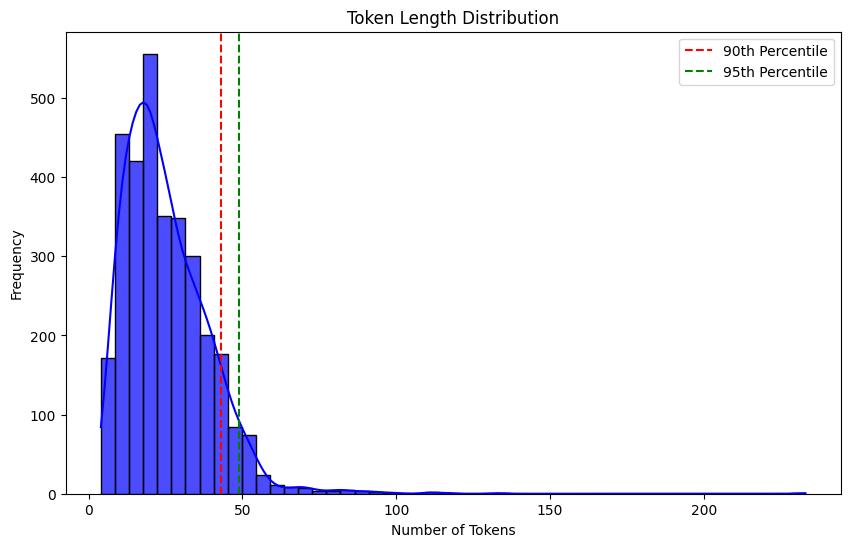

In [29]:
all_lengths = train_lengths + dev_lengths + test_lengths

plt.figure(figsize=(10, 6))
sns.histplot(all_lengths, bins=50, kde=True, color='blue', alpha=0.7)
plt.axvline(x=np.percentile(all_lengths, 90), color='red', linestyle='--', label='90th Percentile')
plt.axvline(x=np.percentile(all_lengths, 95), color='green', linestyle='--', label='95th Percentile')
plt.title('Token Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [30]:
from transformers import EarlyStoppingCallback

In [31]:
import torch
import torch.nn as nn

class custom_loss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, outputs, labels):
        return self.mse_loss(outputs, labels)

In [32]:
from scipy.stats import pearsonr

def compute_pearson_corr(predictions, labels):
    """
    Compute Pearson Correlation between predictions and labels.
    """
    if isinstance(predictions, torch.Tensor):
        predictions = predictions.detach().cpu().numpy()
    if isinstance(labels, torch.Tensor):
        labels = labels.detach().cpu().numpy()
    
    corr, _ = pearsonr(predictions.flatten(), labels.flatten())
    return corr


In [33]:
class CustomTrainer(Trainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.loss_fn = custom_loss()

    def compute_loss(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        """
        Custom loss function for the Hugging Face Trainer.
        """
        labels = inputs.pop("labels")  # Extract labels
        outputs = model(**inputs)      # Forward pass
        logits = outputs.logits        # Extract logits

        loss = self.loss_fn(logits, labels) 

        return (loss, outputs) if return_outputs else loss

In [34]:
from transformers import EvalPrediction
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

def compute_metrics(p: EvalPrediction):
    """
    Compute metrics for evaluation, including Pearson Correlation, Accuracy, Precision, Recall, and F1 score.
    """
    predictions, labels = p.predictions, p.label_ids
    
    predictions_rounded = np.round(predictions).astype(int)
    
    labels_flattened = labels.flatten()
    predictions_flattened = predictions_rounded.flatten()
    
    pearson_corr = compute_pearson_corr(predictions, labels)
    overall_accuracy = accuracy_score(labels_flattened, predictions_flattened)
    precision = precision_score(labels_flattened, predictions_flattened, average='macro')
    recall = recall_score(labels_flattened, predictions_flattened, average='macro')
    f1 = f1_score(labels_flattened, predictions_flattened, average='macro')
    
    return {
        "pearson_corr": pearson_corr,
        "overall_accuracy": overall_accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }


In [35]:
training_args = TrainingArguments(
    output_dir='./results/rus/twitter-xlm-roberta-sentiment-v1',
    report_to=None,
    evaluation_strategy="steps",
    save_total_limit = 1,
    logging_strategy="epoch",
    load_best_model_at_end=True,
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=50,
    weight_decay=0.01,
    metric_for_best_model="pearson_corr",
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [36]:
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=2,  
    early_stopping_threshold=0.01  
)

In [37]:
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback]
)

In [38]:
from unittest import mock
from unittest.mock import Mock
class Dummy:
    def __enter__(self):
        return Mock()

    def __exit__(self, *args):
        pass

In [39]:
with mock.patch('wandb.init', return_value=Dummy()):
    trainer.train()

Step,Training Loss,Validation Loss,Pearson Corr,Overall Accuracy,Precision,Recall,F1 Score
500,0.526600,0.498246,0.384061,0.824587,0.233222,0.276441,0.244649
1000,0.455000,0.445794,0.487632,0.830904,0.309265,0.239431,0.240835
1500,0.428500,0.429859,0.510777,0.832362,0.378557,0.314000,0.307243
2000,0.410900,0.417154,0.530208,0.826045,0.364948,0.326468,0.309953
2500,0.396300,0.409965,0.542091,0.821672,0.289580,0.266447,0.249697
3000,0.384800,0.400146,0.556960,0.816327,0.293467,0.286948,0.255314
3500,0.372500,0.393408,0.567428,0.812439,0.295835,0.301504,0.257840
4000,0.366700,0.386010,0.577957,0.812439,0.298635,0.308916,0.261844
4500,0.356900,0.383614,0.582147,0.813411,0.297071,0.308010,0.260733
5000,0.354400,0.378419,0.589186,0.808552,0.299285,0.312040,0.260459


In [40]:
output_dir = "/kaggle/working/" 

model.save_pretrained(output_dir)

tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")

Model and tokenizer saved to /kaggle/working/


In [41]:

predictions, labels, _ = trainer.predict(dev_dataset)  
clipped_predictions = np.clip(predictions, 0, 3)

discrete_predictions = np.round(clipped_predictions).astype(int)

print("Discrete predictions (0-3):", discrete_predictions)


Discrete predictions (0-3): [[0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 1 0 0]
 ...
 [1 0 1 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]]


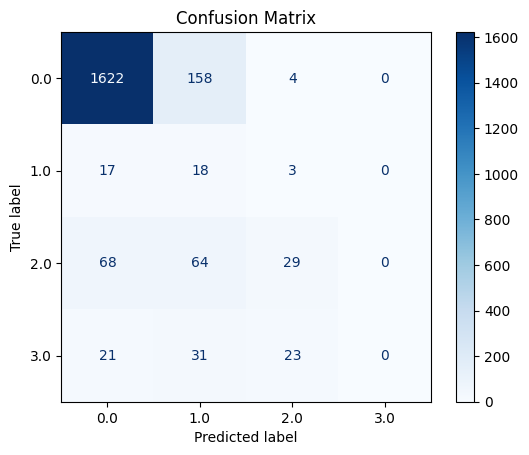

In [42]:
predictions_flattened = discrete_predictions.ravel()
labels_flattened = labels.ravel()

conf_matrix = confusion_matrix(labels_flattened, predictions_flattened)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels_flattened))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [43]:
pre=np.round(predictions).astype(int)

In [44]:
predictions = np.array(pre)
labels = np.array(labels)


if predictions.ndim > 1 and labels.ndim > 1:
    accuracies = []
    for i in range(predictions.shape[1]):  
        acc = accuracy_score(labels[:, i], predictions[:, i])
        accuracies.append(acc)
    overall_accuracy = np.mean(accuracies)
else:
    overall_accuracy = accuracy_score(labels, predictions)

print(f"Accuracy: {overall_accuracy:.2f}")

Accuracy: 0.81


In [45]:
test_encodings = tokenizer(list(test_rus['text']), truncation=True, padding=True, max_length=128, return_tensors="pt")
test_dataset = CustomDataset(test_encodings, np.zeros((len(test_rus), 6)))
test_results = trainer.predict(test_dataset)
predicts=np.round(test_results.predictions).astype(int)

In [46]:
test_rus[['anger', 'disgust', 'fear', 'joy', 'sadness','surprise']] = predicts
test_rus.to_csv('test_predictions_rus_sentiment_xlm_roberta_v2.csv', index=False)